# 1.. What is displot() in Seaborn?

displot() stands for distribution plot.

It is a figure-level function that creates histograms, KDEs (density plots), or both together.

It’s like a combination of:

histplot() → histogram

kdeplot() → kernel density estimate

with extra features like faceting, grouping, and subplots.

# 2. Why Do We Use displot()?
<table>
     <tr>
        <th>Purpose</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>To see the shape of data</td>
        <td>Is it normal, skewed, bimodal, etc.?</td>
    </tr>
    <tr>
        <td>To detect outliers</td>
        <td>Visual outliers stand out easily</td>
    </tr>
    <tr>
        <td>To compare distributions</td>
        <td>Use hue=, col=, or row= to compare across categories</td>
    </tr>
    <tr>
        <td>To combine histogram & KDE</td>
        <td>Gives both counts and smooth density curves</td>
    </tr>
    <tr>
        <td>To automate subplot creation</td>
        <td>displot() automatically creates grid of plots with col or row</td>
    </tr>
</table>

# 3. Is It Important?
o Especially for EDA (Exploratory Data Analysis).

You’ll use it when you want to:

Understand how numeric variables behave

See if a variable is normally distributed

Compare groups (e.g. male vs female spending patterns)

It gives you insight into your data's structure, which is crucial before modeling.


In [3]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load dataset and convert DataFrame
def load_dataset(df_name, file_path):
    file_path = file_path
    df_name = df_name
    
    df_name = pd.read_csv(file_path)
    if df_name is None:
        raise FileNotFoundError("File Path Not Found")
    
    df = pd.DataFrame(df_name)
    return df


df = load_dataset(file_path= r"D:\DataVisualizationForPython\datasets\supermarket_sales_utf8.csv",df_name = "sales")



In [5]:
# fix column names
def fix_column_names(dataframe):
    dataframe.columns = [col.lower().replace(" ", "_") for col in dataframe.columns]
    
# call the fix_column_names
fix_column_names(df)
df.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,692-92-5582,B,Mandalay,Member,Female,Food_and_beverages,54.84,3,8.226,172.746,2/20/2019,13:27:00,Credit card,164.52,4.761905,8.226,5.9
1,351-62-0822,B,Mandalay,Member,Female,Fashion_accessories,14.48,4,2.896,60.816,2019-06-02 00:00:00,18:07:00,Ewallet,57.92,4.761905,2.896,4.5
2,529-56-3974,B,Mandalay,Member,Male,Electronic_accessories,25.51,4,5.102,107.142,2019-09-03 00:00:00,17:03:00,Cash,102.04,4.761905,5.102,6.8
3,299-46-1805,B,Mandalay,Member,Female,Sports_and_travel,93.72,6,28.116,590.436,1/15/2019,16:19:00,Cash,562.32,4.761905,28.116,4.5
4,319-50-3348,B,Mandalay,Normal,Female,Home_and_lifestyle,40.30,2,4.030,84.630,2019-11-03 00:00:00,15:30:00,Ewallet,80.60,4.761905,4.030,4.4


<Figure size 1200x800 with 0 Axes>

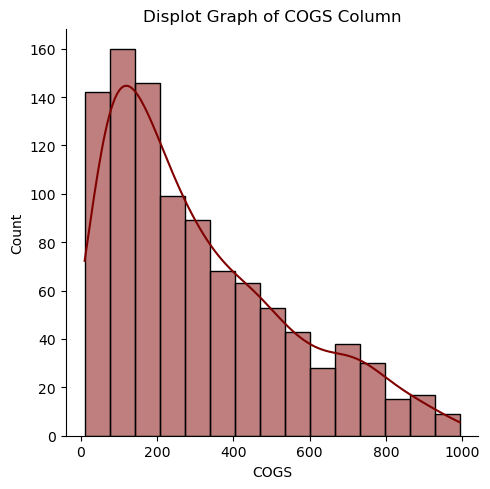

In [9]:
# Create displot 
plt.figure(figsize = (12,8))
sns.displot(data = df, x = "cogs", kde = True, color = "maroon")
plt.title("Displot Graph of COGS Column")
plt.xlabel("COGS")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

<Figure size 1500x1500 with 0 Axes>

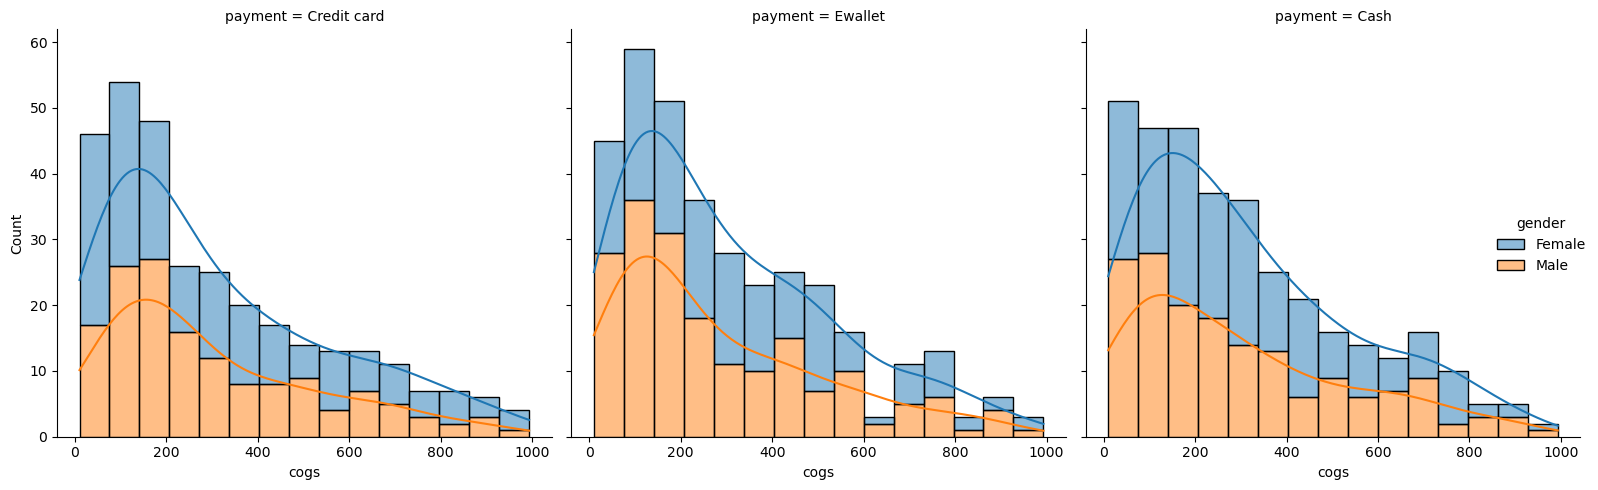

In [14]:
# with argument
plt.figure(figsize = (15,15))
sns.displot(data = df, x = "cogs", kde = True, color = "yellow", rug_kws={"height": 0.1}, hue = "gender", multiple = "stack", col ="payment")
plt.tight_layout()
plt.show()

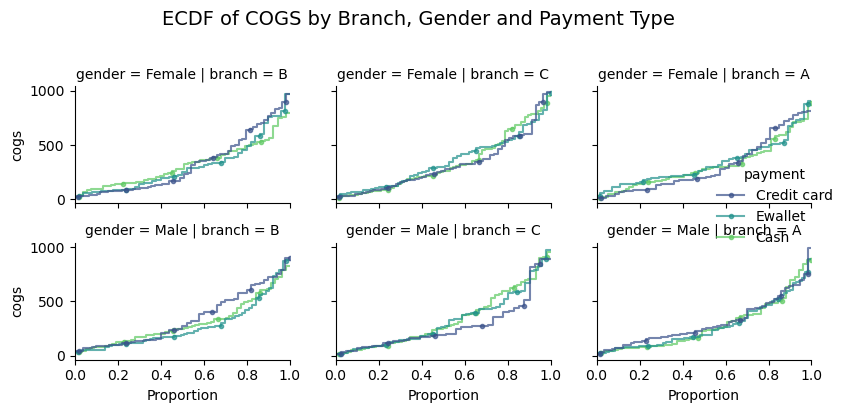

In [43]:
# plt.figure(figsize = (25,15))
sns.displot(data = df, 
            y = "cogs", 
            kind = "ecdf", 
            hue ="payment", 
            col ="branch", 
            row ="gender",
            height=2,# height of each facet
            aspect=1.2,# width/height ratio,
            alpha = 0.7,
            marker = "o",
            markersize = 3,
            markevery = 0.2,
            linewidth = 1.5,
            palette="viridis")
plt.suptitle("ECDF of COGS by Branch, Gender and Payment Type", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()